In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import torch
import sys
import cvxpy as cp
import tqdm
import importlib
import sklearn
import pandas as pd
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler

In [11]:
class Net(nn.Module):

    def __init__(self,input_size):
        super(Net, self).__init__()
        #input_size should be the length of the features vector, specified at the begining 
        self.fc1 = nn.Linear(input_size, input_size*4)
        self.fc2 = nn.Linear(input_size*4, input_size*4)
        self.fc3 = nn.Linear(input_size*4, input_size*4)
        self.fc4 = nn.Linear(input_size*4, input_size*4)
        self.fc5 = nn.Linear(input_size*4, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        x = torch.sigmoid(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [4]:
dataframe = pd.read_csv('/Users/linusbleistein/Documents/Cours ENS/Cours mathématiques/Deep learning 2020-2021/data_project/processed_data.csv')
print(dataframe.head())

   Unnamed: 0          0           1           2         3          4  \
0           0  35.914223  340.111783  244.191304  1.745412  93.341758   
1           1   1.550017   13.919287    0.000182 -0.000060   0.000081   
2           2   0.028112    0.283912    0.000314  0.000403   0.034164   
3           3   0.735473    6.987971    0.023240  0.035425   1.564482   
4           4   0.785418    7.461572    0.025315  0.037810   1.743876   

              5         6             7             8  ...           41  \
0 -2.694931e-07 -0.660855  6.313410e-03  9.161955e-08  ...  1955.011107   
1 -4.859265e-09 -0.000003  9.368407e-09  1.002605e-09  ...     2.950600   
2  2.537544e-08 -0.000005  3.713815e-06  2.054972e-08  ...     0.566343   
3 -5.215645e-08 -0.000381  7.435807e-05  3.000300e-08  ...    57.357101   
4  4.026456e-08 -0.000415  8.040126e-05 -5.799183e-08  ...    61.479207   

           42          43           44           45          46            47  \
0  581.310317 -788.282830 -24

In [5]:
dataframe=dataframe.drop(dataframe.columns[0],axis=1)

In [6]:
dataframe = dataframe.to_numpy()

In [7]:
dataframe = torch.Tensor(dataframe)
dataframe = torch.utils.data.TensorDataset(dataframe[:,0:-1],dataframe[:,-1])

In [41]:
dataframe_size = len(dataframe)
validation_split = 0.3
indices = list(range(dataframe_size))
split = int(np.floor(validation_split * dataframe_size))
np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_set = dataframe[list(train_sampler)]
valid_set = dataframe[list(valid_sampler)]

train_loader = torch.utils.data.DataLoader(train_set, batch_size=10, 
                                           sampler=train_sampler)

validation_loader = torch.utils.data.DataLoader(valid_set, batch_size=10,
                                                sampler=valid_sampler)



In [49]:
#Check the balance of training and test sets 

print(train_set[-1].mean())
print(valid_set[-1].mean())

tensor(0.0001)
tensor(0.0001)


In [28]:
net=Net(input_size=50)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

losslist =[]

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        labels = labels.long()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        losslist.append(loss.item())
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.421
[1,  4000] loss: 0.318
[1,  6000] loss: 0.315
[1,  8000] loss: 0.314
[1, 10000] loss: 0.314
[1, 12000] loss: 0.314
[1, 14000] loss: 0.314
[1, 16000] loss: 0.314
[1, 18000] loss: 0.313
[1, 20000] loss: 0.313
[1, 22000] loss: 0.313
[1, 24000] loss: 0.314
[1, 26000] loss: 0.314
[1, 28000] loss: 0.314
[1, 30000] loss: 0.313
[1, 32000] loss: 0.313
[1, 34000] loss: 0.313
[1, 36000] loss: 0.314
[1, 38000] loss: 0.313
[1, 40000] loss: 0.313
[1, 42000] loss: 0.314
[1, 44000] loss: 0.313
[1, 46000] loss: 0.313
[1, 48000] loss: 0.313
[1, 50000] loss: 0.313
[2,  2000] loss: 0.313
[2,  4000] loss: 0.314
[2,  6000] loss: 0.313
[2,  8000] loss: 0.313
[2, 10000] loss: 0.313
[2, 12000] loss: 0.313
[2, 14000] loss: 0.313
[2, 16000] loss: 0.313
[2, 18000] loss: 0.313
[2, 20000] loss: 0.313
[2, 22000] loss: 0.313
[2, 24000] loss: 0.313
[2, 26000] loss: 0.313
[2, 28000] loss: 0.313
[2, 30000] loss: 0.314
[2, 32000] loss: 0.313
[2, 34000] loss: 0.313
[2, 36000] loss: 0.313
[2, 38000] 

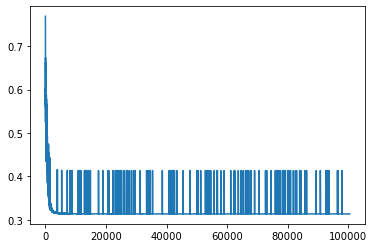

In [29]:
plt.plot(losslist)
plt.show()

In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in validation_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test dataset: %d %%' % (
    100 * correct / total))
print(total)

Accuracy of the network on the test dataset: 99 %
215322


In [53]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

test = get_all_preds(net,validation_loader)
print(test)


IndexError: tuple index out of range